# Sujet 1 : Que proposent les citoyens pour faire face à la transition écologique ?

Au cours du premier trimestre 2019 s'est tenu un "grand débat national" en France. 4 thèmes étaient proposés par le gouvernement : transition écologique, fiscalité et dépenses publiques, démocratie et citoyenneté, organisation de l'état et des services publics. Ce débat a pris plusieurs formes, mais l'une d'elle était la possibilité de donner son avis via l'utilisation d'un formulaire Internet.

L'idée de ce sujet est d'analyser le texte brut des contributions collectées - accessibles directement sur le site du grand débat - pour comprendre ce que proposent les citoyens sur le premier thème, également celui du Funathon : la transition écologique.

Ce notebook propose une première approche du sujet. Il est possible de le suivre, pour apprendre les bases de l'analyse textuelle. N'hésitez cependant pas à vous en éloigner autant que vous le souhaitez - voire à ne pas l'utiliser - si cela vous semble plus intéressant. Et dans tous les cas, si vous ne parvenez plus à avancer, n'hésitez pas à nous contacter pour que nous puissions essayer de vous aider !

**Remarque importante : l'intégralité des méthodes présentées ici sont présentées de façon plus détaillée dans le module de formation "analyse textuelle sous Python" présent sur le datalab. Si vous souhaitez prendre le temps de comprendre tous ces éléments, il est recommandé de commencer par suivre ce notebook - qui n'est pas directement lié au sujet - afin d'être plus autonome dans l'application des méthodes à la question du grand débat.**

## Préliminaire : chargement des données et mise en forme rapide

Les données sont disponibles directement sur le site du grand débat national ([https://granddebat.fr/pages/donnees-ouvertes](https://granddebat.fr/pages/donnees-ouvertes)). Il est possible pour vous de les télécharger, puis les importer ici. Alternativement, nous les avons déjà mises à disposition sur le datalab, dans le répertoire diffusion du répertoire Funathon.

Ici, on est dans la manipulation de données sur le datalab. Pour faire simple, on utilise la librairie "boto3", et on récupère le fichier présent dans la base pour le ramener chez nous, puis l'ouvrir, puis, comme il devient inutile, l'effacer.

In [1]:
import boto3
import pandas as pd

# On définit le client : c'est "minio"
s3 = boto3.client("s3",endpoint_url = "https://minio.lab.sspcloud.fr")

# On va ensuite chercher le fichier dans le répertoire diffusion, pour le ramener ici
s3.download_file(Bucket = "projet-ssplab", Key = "diffusion/GRAND_DEBAT_QO_LA_TRANSITION_ECOLOGIQUE_20210321.csv", Filename = "LA_TRANSITION_ECOLOGIQUE.csv")

# On ouvre ensuite dans pandas. Le warning n'est pas un problème.
donnees = pd.read_csv("LA_TRANSITION_ECOLOGIQUE.csv")

/tmp/ipykernel_888/1868434644.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  donnees = pd.read_csv("LA_TRANSITION_ECOLOGIQUE.csv")


On peut observer que les noms de colonnes sont assez lourds

In [17]:
donnees.columns

Index(['id', 'reference', 'title', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode',
       'QUXVlc3Rpb246MTYw - Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?',
       'QUXVlc3Rpb246MTYx - Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?',
       'QUXVlc3Rpb246MTQ2 - Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?',
       'QUXVlc3Rpb246MTQ3 - Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?',
       'QUXVlc3Rpb246MTQ4 - À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?',
       'QUXVlc3Rpb246MTQ5 - Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?',
       'QUXVlc3Rpb246MTUw - Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux en

Pour simplifier la suite, on renomme donc les colonnes de façon plus courtes

In [3]:
donnees.columns = ['id','reference','title','createdAt','publishedAt','updatedAt','trashed','trashedStatus','authorId','authorType','authorZipCode','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16']

## 1. Première analyse d'une question ouverte : un nuage de mots

Une première proposition d'analyse est la suivante : considérer l'ensemble des réponses à une question ouverte, et essayer de les analyser en les synthétisant.

Pour cela, on choisit ici, par exemple, d'analyser la question suivante : **"Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?"**. C'est la question 1. On efface déjà toutes les lignes qui n'ont pas répondu à la question.

In [4]:
donnees = donnees[donnees.Q1.notna()]

On peut observer le nombre de lignes restantes : environ 143 000.

In [5]:
donnees.shape

(143326, 27)

La première analyse peut constituer à concaténer toutes ces réponses, et à chercher les mots les plus fréquents parmi cet ensemble. C'est donc ce que l'on fait. Pour cela, l'idée est simplement de passer en revue toutes les lignes, de les rassembler en une grande liste, puis de rassembler tous les éléments de cette liste en un seul élément (grâce à l'instruction "join"). On procède donc de la façon suivante :

In [10]:
# On crée une liste complète en parcourant toutes les réponses à la Q1, et en le mettant dans une liste appelée "liste-Q1"
liste_Q1 = [w for w in donnees.Q1]
# Ensuite, notre liste de mots est simplement constituée de la jointure de tous les éléments de la liste
words = ' '.join(liste_Q1)

## 1.1. Premier nuage de mots

A partir de cela, on peut faire un nuage de mots. On installe juste la librairie "wordcloud", puis on signale qu'on l'utilise. Cette librairie est spécialisée dans les nuages de mots. On en installe également une autre, plus connue sans doute, qui permet de tracer des graphiques.

In [7]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.6/363.6 KB 599.7 kB/s eta 0:00:00a 0:00:01


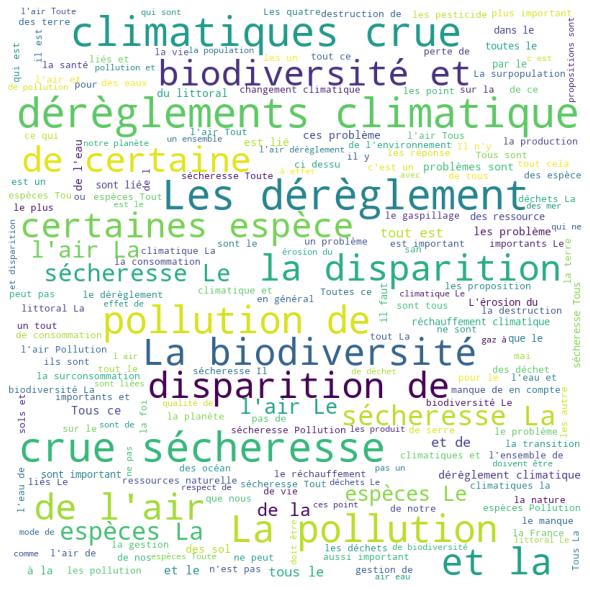

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Les résultats ne sont pas satisfaisants : on va donc nettoyer les données.

## 1.2. Nettoyer ses documents

### 1.2.1. Harmoniser le vocabulaire

#### 1.2.1.1. On retire les accents

Important, sur corpus en français, en général on retire les accents qui pourraient poser des problèmes par la suite. En python, on effectue cela en modifiant l'encodage :

In [32]:
#!pip install unidecode
from unidecode import unidecode


def remove_accent(s):

    s = unidecode(s)
    return(s)

donnees['Q1'] = donnees['Q1'].apply(lambda x:remove_accent(str(x)))


/tmp/ipykernel_888/113999931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees['Q1'] = donnees['Q1'].apply(lambda x:remove_accent(str(x)))


#### 1.2.1.2. On retire la ponctuation et les nombres

On retire la ponctuation et les nombres, ce qui revient à ne garder que ce qui est une lettre, pour cela on fait une opération de remplacement en s'appuyant sur les expressions régulières qui sont une manière de décrire des "motifs", ici `[^a-z]` signifie : tout ce qui n'est pas du texte (fonctionne ici car on a retiré les accents, si on veut conserver les accents on peut utiliser la fonction `removePunctuation` de `tm` mais elle n'est pas exhaustive, elle ne traite pas l'apostrophe par exemple).

Les expressions régulières sont très utiles afin de sélectionner des chaînes de caractères d'un format particulier (comme les numéros de téléphone, les adresses email ou encore les liens vers des pages web). Un chapitre leur est consacré ci-dessous. 

Pour manipuler des expressions régulières en python, on utilise la librarie `re`.

In [36]:
import re

def remove_punctuation(s):
    # On retire la ponctuation
 
    s = re.sub(r'[^A-Za-z]',' ',str(s))
    return(s)

donnees['Q1'] = donnees['Q1'].apply(lambda x:remove_punctuation(str(x)))


/tmp/ipykernel_888/1625593646.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees['Q1'] = donnees['Q1'].apply(lambda x:remove_punctuation(str(x)))


#### 1.2.1.3. On harmonise la casse

On peut réduire la casse pour avoir une casse harmonisée (Rq : cette étape et la précédente peuvent être interverties, il faut simplement le prendre en considération dans l'expression régulière précédente).

Remarque : la fonction `split()`suivie d'un `' '.join()` permet d'harmoniser le nombre d'espace.

In [37]:
# On réduit la casse

def tolower(s):
    s = ' '.join(s.lower().split())
    return(s)
    
donnees.Q1 = donnees.Q1.apply(lambda x:tolower(str(x)))
donnees.Q1.head()

/tmp/ipykernel_888/1591522032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees.Q1 = donnees.Q1.apply(lambda x:tolower(str(x)))


1    les problemes auxquels se trouve confronte l e...
2         les dereglements climatiques crue secheresse
3                                la pollution de l air
4    la biodiversite et la disparition de certaines...
5                                la pollution de l air
Name: Q1, dtype: object

### 1.2.2. Réduire la dimension



#### 1.2.2.1. On retire les "mots vides"

On retire les mots dits "mots outils" (ou stopwords), qui n'apportent rien car ils sont presque toujours présents dans tous les documents. 

Pour cela, le package important est le package "stop_words", qui permet d'apprendre les stop words français.

In [39]:
#!pip install stop_words
#!pip install nltk
import nltk
nltk.download('punkt')

from stop_words import get_stop_words
import unicodedata

from nltk.tokenize import word_tokenize

stopwords = get_stop_words('french')
        
stopwords = [unicodedata.normalize('NFKD',m).encode('ASCII', 'ignore').decode() for m in stopwords]

# Sur cette base, on crée une petite fonction qui retire les stop words
def remove_stopwords(s):
    s = [w for w in word_tokenize(s) if w not in stopwords]
    s = ' '.join(s)
    return(s)

donnees.Q1 = donnees.Q1.apply(lambda x:remove_stopwords(x))
donnees.Q1.head()

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1    problemes auxquels trouve confronte ensemble p...
2             dereglements climatiques crue secheresse
3                                        pollution air
4           biodiversite disparition certaines especes
5                                        pollution air
Name: Q1, dtype: object

#### 1.2.2.2. Lemmatisation et racinisation

Pour des raisons grammaticales, les documents vont utiliser différentes formes d'un mot, comme *suis*, *est* ou *être*. De plus, il existe des familles de mots dérivés ayant des significations similaires, tels que démocratie, démocratique et démocratisation. Dans de nombreuses situations, il semble qu'il serait utile de remplacer toutes ces variantes par un unique terme dans les analyses (exemple remplacer *suis*, *est* ou *être* par *être*.

L'objectif de la lemmatisation et de la racinisation est de réduire les formes flexionnelles et parfois les formes dérivées d'un mot à une forme de base commune.

***racinisation***

La racinisation consiste à transformer les mots en élminant les formes flexionnelles afin de ne conserver que leurs racines. La racine d'un mot correspond à la partie du mot restante une fois que l'on a supprimé son (ses) préfixe(s) et suffixe(s), à savoir son radical. C'est ainsi que "économie" ou "économiste" peut devenir "économ".
La racinisation est assez simple à mettre en oeuvre car elle repose en général sur des règles. Un exemple d'algorithme est celui de Porter (cf. https://fr.wikipedia.org/wiki/Racinisation)

Concrètement, l'idée ici d'utiliser les méthodes PorterStemmer et word_tokenize, et de les appliquer directement à notre première question. 


In [41]:
from nltk.stem.snowball import PorterStemmer
from nltk.tokenize import word_tokenize

def stem(s):
    stemmer = PorterStemmer()
    s = [stemmer.stem(w) for w in word_tokenize(s)]
    s = ' '.join(s)
    return(s)

donnees.Q1 = donnees.Q1.apply(lambda x:stem(x))
donnees.Q1.head()

1    problem auxquel trouv confront ensembl planet ...
2                      deregl climatiqu crue secheress
3                                           pollut air
4                   biodiversit disparit certain espec
5                                           pollut air
Name: Q1, dtype: object

## 1.3. Nouveau nuage de mots

A ce stade, on peut retenter un nuage de mots, et observer ce qui a changé. On procède exactement de la même façon qu'au début, en recréant une liste de mots.

In [42]:
# On crée une liste complète en parcourant toutes les réponses à la Q1, et en le mettant dans une liste appelée "liste-Q1"
liste_Q1 = [w for w in donnees.Q1]
# Ensuite, notre liste de mots est simplement constituée de la jointure de tous les éléments de la liste
words_2 = ' '.join(liste_Q1)

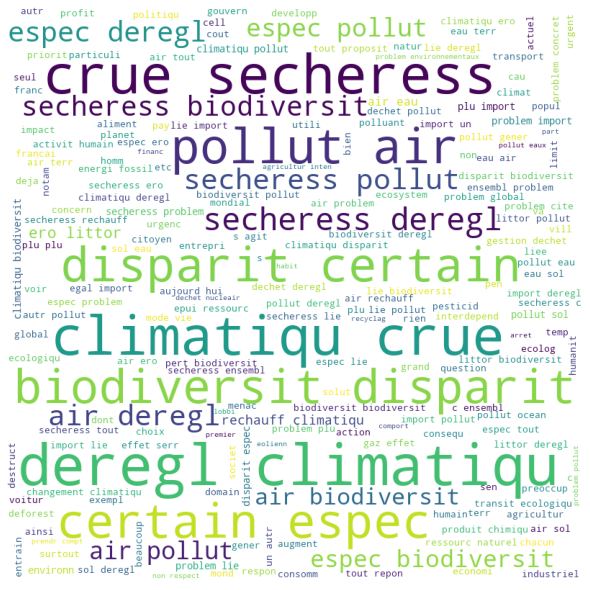

In [43]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(words_2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

On arrive donc à mettre en avant, de façon relativement simple, les grands termes qui caractérisent les préoccupations des français en répondant à cette question. Pour aller plus loin, il est possible de faire pas mal d'autres choses, notamment (i) améliorer les traitements, en particulier pour tenir compte des spécificités du sujet (en regroupant des mots de la même thématique, par exemple) ; (ii) tester ce même exercice sur d'autres questions du grand débat.

Il est également possible d'utiliser d'autres types de méthodes : la partie 2 en propose une, en parlant de clustering de réponses.

# 2. Appliquer une méthode de clustering aux réponses à une question du grand débat

Une façon de traiter le sujet peut être de s'intéresser aux réponses aux deux premières questions :

- Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?
- Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?

Et d'analyser les réponses à la question 2 relatives à un même problème identifié en question 1. Pour l'exemple, on va sélectionner les contributions identifiant le déréglement climatique comme le problème concret le plus important, et tenter de faire émerger des groupes d'actions proposées par les citoyens en réponse à ce problème. On propose ici d'appliquer une LDA. On peut trouver une présentation détaillée (et théorique) de la LDA [ici](https://git.lab.sspcloud.fr/ssplab/formation_text_mining_public/-/raw/master/Slides_formation_text_mining.pdf?inline=false)). Ici, on l'envisagera comme un algorithme qui à un ensemble de documents associe un nombre prédéfini de "sujets", en les caractérisant par les mots utilisés quand ce sujet est évoqué.

## 2.1. Chargement des données

La première étape est celle du chargement des données. Ces données étant les mêmes que précédemment, cette étape n'est pas décrite ici. Pour autant, il est nécessaire de les recharger car on va avoir besoin de retrouver la question 1 avant ses prétraitements. On replace donc ci-dessous les principales instructions :

In [199]:
donnees = pd.read_csv("LA_TRANSITION_ECOLOGIQUE.csv")
donnees.columns = ['id','reference','title','createdAt','publishedAt','updatedAt','trashed','trashedStatus','authorId','authorType','authorZipCode','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16']

/tmp/ipykernel_888/1782651562.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  donnees = pd.read_csv("LA_TRANSITION_ECOLOGIQUE.csv")


## 2.2. Limitation à certaines contributions

Comme indiqué, l'objectif ici est de se limiter aux contributions qui identifient le déréglement ou le réchauffement climatique comme étant le problème le plus important (en réponse à la question 1), l'objectif étant d'analyser dans ce cas leurs solutions proposées (en réponse à la question 2). Pour réussir cela, on procède de la façon suivante :
- on filtre notre tableau de données en ne conservant que les contributions ayant les mots "dérèglements", "réchauffement", et "climatique" dans la réponse
- Ensuite, on réalisera tous nos traitements sur la réponse à la question 3 de ces seuls contributeurs

Pour cela, on suppose qu'on a bien rechargé les données (sinon, les réponses à la question 1 sont racinées), et on va juste enlever les accents pour éviter les fautes de frappes. Et on cherche, dans les réponses à la question 1, celles qui contiennent "dereglement" ou "rechauffement" (avec ou sans "s" grâce au point d'interrogation" et où le mot suivant commence par climat.

Remarque : dans le formulaire du grand débat, la réponse "déréglement climatique" était proposée directement

In [200]:
donnees['Q1'] = donnees['Q1'].apply(lambda x:remove_accent(str(x)))

donnees_reduites = donnees[donnees['Q1'].str.contains(r'(dereglement?|rechauffement?) climat')]
donnees_reduites.shape

/tmp/ipykernel_888/1737425437.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  donnees_reduites = donnees[donnees['Q1'].str.contains(r'(dereglement?|rechauffement?) climat')]


(3115, 27)

On observe qu'il reste 3115 contributions à ce stade : ce sont sur celles-ci qu'on va travailler, et plus exactement sur leur réponse à la question 2 (que faut-il faire).

## 2.3. Même joueur joue encore : nettoyage des données

Pour réaliser une LDA, la première étape est de mettre en forme les données. Pour cela, il s'agit de remettre en place les opérations de nettoyage déjà détaillées précédemment (retirer les accents, raciniser, etc...). Sachant que la question traitée est la question 2, à vous de mettre en place ce travail !

In [45]:
# Réaliser, sur la question 2, les mêmes opérations de nettoyage que celles effectuées sur la question 1. 
# (si besoin, la solution est présente dans la cellule ci-dessous)


In [202]:
# Solution si besoin : 

# Téléchargement de l'ensemble des packages, si nécessaire (décommenter le cas échéant)
#!pip install unidecode
#!pip install stop_words
#!pip install nltk

# Chargement des packages
from unidecode import unidecode
import re
import nltk
nltk.download('punkt')
from stop_words import get_stop_words
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import PorterStemmer
from nltk.tokenize import word_tokenize

# Définition de quelques fonctions utiles
def remove_accent(s):
    s = unidecode(s)
    return(s)

def remove_punctuation(s):
    # On retire la ponctuation
    s = re.sub(r'[^A-Za-z]',' ',str(s))
    return(s)

def tolower(s):
    # On passe tout en minuscule
    s = ' '.join(s.lower().split())
    return(s)

def remove_stopwords(s):
    # On enlève les stopwords (sur la base d'une liste déjà chargée)
    s = [w for w in word_tokenize(s) if w not in stopwords]
    s = ' '.join(s)
    return(s)

def stem(s):
    # Fonction de racinisation
    stemmer = PorterStemmer()
    s = [stemmer.stem(w) for w in word_tokenize(s)]
    s = ' '.join(s)
    return(s)

# Application successive des différentes méthodes
# Remarque : on crée une nouvelle colonne "Q2_propre" pour garder les réponses initiales

# On enlève les accents
donnees_reduites['Q2_propre'] = donnees_reduites['Q2'].apply(lambda x:remove_accent(str(x)))
# On enlève la ponctuation
donnees_reduites['Q2_propre'] = donnees_reduites['Q2_propre'].apply(lambda x:remove_punctuation(str(x)))
# On passe tout en minuscule
donnees_reduites['Q2_propre'] = donnees_reduites['Q2_propre'].apply(lambda x:tolower(str(x)))
# On enlève les stopwords
stopwords = get_stop_words('french') 
stopwords = [unicodedata.normalize('NFKD',m).encode('ASCII', 'ignore').decode() for m in stopwords]
donnees_reduites['Q2_propre'] = donnees_reduites['Q2_propre'].apply(lambda x:remove_stopwords(x))
# On racinise
donnees_reduites['Q2_propre'] = donnees_reduites['Q2_propre'].apply(lambda x:stem(x))
donnees_reduites['Q2_propre'].head()

# Remarque : l'execution de l'intégralité de la cellule prendre quelques minutes



[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_888/1425305629.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_reduites['Q2_propre'] = donnees_reduites['Q2'].apply(lambda x:remove_accent(str(x)))
/tmp/ipykernel_888/1425305629.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_reduites['Q2_propre'] = donnees_reduites['Q2_propre'].apply(lambda x:remove_punctuation(str(x)))
/tmp/ipykernel_888/1425305629.

1      problem auxquel trouv confront ensembl planet ...
38     permettr mise place agricultur respons detruis...
114    plu sponsoris projet lie emiss carbon franc et...
152    taxer plu gro pollueur tourism avion mettr pla...
197    lancement ambitieux grand travaux programm exh...
Name: Q2_propre, dtype: object

**Remarque :** Il est possible de réaliser la plupart des traitements précédents (harmonisation de la casse, élimination des accents, des mots vides etc.), en une seule étape, dans la fonction CountVectorizer de scikit-learn. Attention cependant au traitement des accents par le paramètre skip_accents = "ascii" qui élimine les apostrophes et de ce fait transforme les mots tels que l'indice en lindice. 

## 2.4. Matrice document / terme

Pour la suite du travail, on va changer le format des données. Actuellement, on dispose d'un tableau dans lequel une ligne représente une contribution, et une colonne la réponse à une question. Dans ce tableau, les réponses à la question 2 ont actuellement été retravaillées et mises en forme.

En analyse textuelle, un format pratique est la "matrice documents/termes". L'idée est simple : en considérant l'ensemble du corpus (ici, l'ensemble des réponses à la question 2), on peut réaliser une liste isolant tous les mots possibles. On peut alors, pour chaque "document" (ici, chaque réponse à une question, ou chaque ligne du tableau initial), compter le nombre de fois où un des mots possibles apparait. Ce faisant, on perd la notion d'ordre - mais qui n'est jamais utilisée -, au profit d'une mise en forme pratique qui permettra d'obtenir, par exemple, très facilement des statistiques sur la répartition des mots. Ce nouveau format s'appelle une matrice "document / terme", car elle associe à chaque "document" (ici réponse) un décompte du nombre de "termes" (mots possibles) présent.

D'un point de vue pratique, cette étape est très facile, et présentée ci-après :

In [203]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

# charger un vectorizer
vect = CountVectorizer(lowercase=True)
# creer la matrice documents x termes à l'aide du vectorizer
dtm = vect.fit_transform(donnees_reduites['Q2_propre'].apply(lambda s:str(s)))

Pour vérifier qu'on a bien compris, on peut observer la dimension de la matrice :

In [204]:
print(dtm.shape)

(3115, 10316)


On retrouve bien le nombre de lignes que nous avions sélectionnées (3 115), le nombre de colonnes correspondant au nombre de mots différents existants.

Par curiosité, on peut en profiter pour regarder quels sont les mots les plus présents. Pour cela, on réalise un petit graphique mettant en avant les 20 mots les plus présents dans les réponses à la question 2.

/opt/conda/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


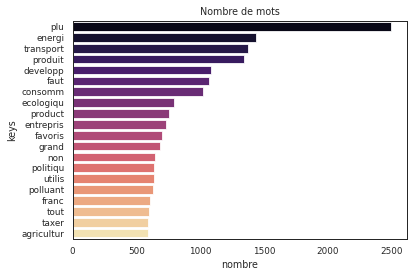

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

vocabulaire = pd.concat([pd.Series(dtm.toarray().sum(axis=0)),pd.Series(vect.get_feature_names())],axis=1)
vocabulaire.columns = ["nombre","keys"]
vocabulaire = vocabulaire.sort_values(by=["nombre"],ascending = False)
vocabulaire = vocabulaire.iloc[:20,]

# create plot
sns.barplot(y = 'keys', x = 'nombre', data = vocabulaire, palette = 'magma')
plt.title('Nombre de mots')
plt.show()
plt.close()

## 2.5. Mise en place de la LDA

La première étape ici est déjà de charger un certain nombre de packages nécessaires.

In [159]:
# Load the LDA model from sk-learn
!pip install gensim

# Gensim
import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
!pip install spacy
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt

Pour utiliser Gensim, pas mal de paramètres sont nécessaires. Il y en a surtout 3 principaux :
- le "dictionnaire", i.e. l'ensemble des mots possibles. Nous avons déjà calculé cela dans la partie précédente et appelé cela "vocabulaire". Le format d'entrée de Gensim est cependant un peu différent, et il faudra le recalculer, mais la logique est la même.
- la matrice document-terme. Là aussi, nous l'avons déjà calculée, mais le format diffère un peu, et devra de toute façon reprendre le même ordre de mots que celui recalculé dans le dictionnaire
- le nombre de sujets attendu. Sur ce point, un paramétrage précis serait nécessaire, mais dans le cas qui nous intéresse on va supposer qu'il y a 3 familles de réponses possibles pour pouvoir les caractériser. 

Sur ce dernier paramètre, comme sur tous les autres, n'hésitez pas à creuser pour comprendre et améliorer !

In [206]:
# Création du dictionnaire
dictionnaire = corpora.Dictionary([str(w).split() for w in donnees_reduites['Q2_propre']])

# Creation du corpus (ensemble des réponses)...
texts = donnees_reduites['Q2_propre']

# ... et calculer d'une matrice documents/termes cohérente
matrice_dtm = [dictionnaire.doc2bow(str(text).split()) for text in texts]


In [207]:
# On peut alors faire tourner le modèle
lda_model = gensim.models.ldamodel.LdaModel(corpus=matrice_dtm,
                                           id2word=dictionnaire,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

Une fois que le modèle existe, on peut afficher, pour chacun des sujets (i.e. des blocs de réponse), ce qui a le plus compté dans la constitution.

In [208]:
# Print the Keyword in the 10 topics
for k,topic in enumerate(lda_model.print_topics()):
    print("Sujet no : "+str(k))
    print(topic)
    print("")
    
doc_lda = lda_model[matrice_dtm]

Sujet no : 0
(0, '0.018*"plu" + 0.013*"faut" + 0.009*"ecologiqu" + 0.008*"entrepris" + 0.008*"s" + 0.007*"politiqu" + 0.007*"climatiqu" + 0.006*"citoyen" + 0.006*"c" + 0.006*"tout"')

Sujet no : 1
(1, '0.017*"produit" + 0.017*"energi" + 0.017*"transport" + 0.013*"developp" + 0.008*"plu" + 0.008*"favoris" + 0.008*"consomm" + 0.008*"product" + 0.008*"reduir" + 0.007*"voitur"')

Sujet no : 2
(2, '0.017*"giec" + 0.010*"eur" + 0.009*"million" + 0.008*"etud" + 0.008*"cf" + 0.007*"milliard" + 0.006*"appel" + 0.006*"malgr" + 0.006*"femm" + 0.005*"organism"')



La `perplexite` correspond à une expression (normalisée par le compte total d’occurrences) de la log-vraisemblance du corpus. Elle peut être mobilisée pour choisir le nombre de sujets à retenir (on choisit le nombre le plus élevé avant que la perplexité ne commence à décroître).

In [209]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -14.625468999895146


On peut également associer à chaque contribution sélectionnée (actuellement présente dans "donnees_reduites") son sujet de référence, et la probabilité qu'il y soit, ceci peut permettre pas mal d'analyses, et plus simplement de regarder à la main par exemple la réponse qui a été formulée pour un sujet donné

In [210]:
topics = pd.DataFrame()

for k,p in enumerate(lda_model.get_document_topics(matrice_dtm)):
    row = pd.DataFrame(p).sort_values(1,ascending=False).iloc[0,:]
    topics = pd.concat([topics,row],axis=1)
    
topics = topics.transpose()
topics.index = donnees_reduites.index
topics.columns = ["no_topic","probability"]

data2 = pd.concat([topics,donnees_reduites],axis=1)

data2.head()

,no_topic,probability,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q2_propre
1,0.0,0.645201,UHJvcG9zYWw6M2RmZmUxZjMtMWUyMS0xMWU5LTk0ZDItZm...,2-5,La surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mettre en oeuvre au niveau national ses engage...,Les problèmes auxquels se trouve confronté l’e...,problem auxquel trouv confront ensembl planet ...
38,0.0,0.608578,UHJvcG9zYWw6NjhmZDA1MDctMWUyMy0xMWU5LTk0ZDItZm...,2-47,écologie,2019-01-22 09:55:04,2019-01-22 09:55:04,NaN,False,NaN,...,réduction d'impots,Oui,NaN,Non,la mise en place d'un réseau utilisable,Les transports en commun|Le transport à la dem...,les communes,respecter ces engagements,Ne plus faire semblant de la mettre en place,permettr mise place agricultur respons detruis...
114,0.0,0.578923,UHJvcG9zYWw6NDNjNmFhYzgtMWUyNS0xMWU5LTk0ZDItZm...,2-132,Rechauffement climatique : urgence !,2019-01-22 10:08:21,2019-01-22 10:08:21,NaN,False,NaN,...,•\tJe travaille dans le secteur du developpeme...,NaN,NaN,Oui,•\tIl faudrait que les solutions proposees soi...,Le transport à la demande,Les grosses entreprises pourraient mettre en p...,•\tTout d’abord etre exemplaire !!! C’est un p...,•\tLe changement climatique est LE defi du siè...,plu sponsoris projet lie emiss carbon franc et...
152,0.0,0.498697,UHJvcG9zYWw6MmNmMTc3NWUtMWUyNi0xMWU5LTk0ZDItZm...,2-177,écologie à sens unique,2019-01-22 10:14:52,2019-01-22 10:14:52,NaN,False,NaN,...,rééquilibrer les charges sur la totalité de la...,Oui,me laisser de la place fiscale pour investir,Non,NaN,en tant que parent isolé je n'ai aucune possib...,NaN,NaN,l'effort écologique doit être mieux répartit s...,taxer plu gro pollueur tourism avion mettr pla...
197,1.0,0.731325,UHJvcG9zYWw6ZTZmMzE4MzctMWUyNi0xMWU5LTk0ZDItZm...,2-228,Mesures pour l'urgence écologique,2019-01-22 10:20:04,2019-01-22 10:20:04,NaN,False,NaN,...,Ne pas avoir à avancer d’argent pour changer m...,Oui,Même problématique que pour le changement de v...,Non,Les transports collectifs en zone rurale sont ...,Les transports en commun|L'auto partage|Le vél...,"Niveau local : communauté de communes, conseil...",On ne peut convaincre les réticents qu’en mont...,La protection de notre environnement n'est pos...,lancement ambitieux grand travaux programm exh...


On peut par exemple observer que la contribution 2-228 a une probabilité forte d'être dans le sujet 1, tandis que la contribution 2-5 a une probabilité forte d'être dans le sujet 0. On peut regarder le texte écrit pour chaque contribution. (remarque : l'instruction "list" sert juste à s'assurer qu'il affiche toute la ligne)

In [220]:
print(list(donnees_reduites[donnees_reduites['reference']=='2-228']['Q2']))

['Lancement ambitieux de “Grands Travaux” : programme exhaustif d’isolation thermique du bâti, remplacement du parc automobile le plus polluant, développement rapide de toutes les énergies renouvelables, aide massive aux agriculteurs souhaitant passer au bio, facilitation du télétravail partiel pour limiter les transports quotidiens…']


In [223]:
print(list(donnees_reduites[donnees_reduites['reference']=='2-47']['Q2']))

["Permettre la mise en place d'une agriculture responsable qui ne détruise plus nos resources comme actuellement. Cela va de paire avec le développement de nouvelles habitudes de consommation. plus de local et moins de viande"]


Enfin, il est possible d'avoir un aperçu visuel de tout cela grâce à une interface intégrée. Seul petit problème : cela gêne la bonne utilisation du notebook. Une fois que vous avez terminé, l'idéal est donc de cliquer gauche "delete cell" pour en sortir complètement.

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, dictionnaire, matrice_dtm)

Evidemment, beaucoup de choses sont améliorables. A ce stade, vous avez cependant une base pour explorer les données, à vous de jouer !

# 3. Préoccupations environnementales et expositions locales

La dernière proposition d'exploitation de la base du grand débat proposée est un peu différente. Elle repose sur une question : lorsque les contributeurs se déclarent particulièrement préoccupés par un risque environnemental donné (exemple : pollution de l'air), sont-ils directement concernés ? Pour cela, l'idée est de confronter les données du grand débat - pour lesquelles on connait la commune du répondant - avec les données de pollution de l'air.

## 3.1. Chargement des données

Pour ce travail, on propose d'avoir recours à trois types de données :
- les données du grand débat, déjà utilisées ci-dessus ;
- les données de pollution de l'air (modélisation Inéris) à la commune (COG 2017)
- la correspondance codes postaux / codes communes, car les données du grand débat sont reliées au code postal, celles de la pollution à la commune.

Pour les charger, il suffit de faire comme précédemment :

In [228]:
import boto3
import pandas as pd

s3 = boto3.client("s3",endpoint_url = "https://minio.lab.sspcloud.fr")

# Données du grand débat 
donnees = pd.read_csv("LA_TRANSITION_ECOLOGIQUE.csv")
donnees.columns = ['id','reference','title','createdAt','publishedAt','updatedAt','trashed','trashedStatus','authorId','authorType','authorZipCode','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16']

## Pollution de l'air (données modélisation Ineris) à la communes (COG 2017)
s3.download_file(Bucket = "projet-ssplab", Key = "diffusion/PM25_ineris_com2017_2009_2017.csv", Filename = "pollution_de_lair.csv")
pollution = pd.read_csv("pollution_de_lair.csv")

# Code postaux -- code communes : https://www.data.gouv.fr/en/datasets/base-officielle-des-codes-postaux/
s3.download_file(Bucket = "projet-ssplab", Key = "diffusion/code_postaux_code_communes.csv", Filename = "code_postaux_code_communes.csv")
codes = pd.read_csv("code_postaux_code_communes.csv", sep = ';')


/tmp/ipykernel_888/2893439348.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  donnees = pd.read_csv("LA_TRANSITION_ECOLOGIQUE.csv")


In [230]:
pollution.head()

,ANNEE,code,epc,reg,PM25
0,2009,43250,200073393.0,84,16.029175
1,2009,43267,200073419.0,84,17.147257
2,2009,45029,200068278.0,24,15.785280
3,2009,55219,245501242.0,44,16.901570
4,2009,55220,200066157.0,44,16.759615


## 3.2. Exemple de définition pour préoccupation relative à la qualité de l'air

On choisit de définir une préoccupation relative à la qualité de l'air comme l'occurence du mot "air" ou "atmosphère" ou "particules " ou "COV" (composés organiques volatiles) dans la réponse à la question "Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?" (soit la question 1).

In [265]:
# On restreint la base aux deux seules colonnes qui nous intéressent 
donnees_pol = donnees[["Q1","authorZipCode"]]
# On enleve juste les accents, et on met en minuscule pour être tranquilles (cf. ci-dessus)
donnees_pol['Q1_propre'] = donnees_pol['Q1'].apply(lambda x:remove_accent(str(x)))
donnees_pol['Q1_propre'] = donnees_pol['Q1_propre'].apply(lambda x:tolower(str(x)))

/tmp/ipykernel_888/415734517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_pol['Q1_propre'] = donnees_pol['Q1'].apply(lambda x:remove_accent(str(x)))
/tmp/ipykernel_888/415734517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_pol['Q1_propre'] = donnees_pol['Q1_propre'].apply(lambda x:tolower(str(x)))


In [266]:
donnees_pol.head()

,Q1,authorZipCode,Q1_propre
0,NaN,97231.0,nan
1,Les problèmes auxquels se trouve confronté l’e...,57000.0,les problemes auxquels se trouve confronte l'e...
2,"Les dérèglements climatiques (crue, sécheresse)",34140.0,"les dereglements climatiques (crue, secheresse)"
3,La pollution de l'air,17400.0,la pollution de l'air
4,La biodiversité et la disparition de certaines...,35430.0,la biodiversite et la disparition de certaines...


In [328]:
donnees_pol['inquietude'] = donnees_pol["Q1"].str.contains(r'air|atmosph|cov|particule', regex = True, na = 0)*1
sum(donnees_pol['inquietude'])

/tmp/ipykernel_888/887631078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_pol['inquietude'] = donnees_pol["Q1"].str.contains(r'air|atmosph|cov|particule', regex = True, na = 0)*1


35629

A ce stade, on a besoin d'apparier notre base avec la base sur la pollution. L'idée est de pouvoir associer à chaque contributeur une pollution de l'air subie dans la commune, ainsi que l'indicatrice déjà créée permettant de savoir si la personne a mis en avant la pollution comme principal problème.

Pour autant, un problème méthodologique un peu pénible réside dans le fait que c'est le code postal de l'auteur de la contribution qui est connu, alors que c'est au code commune (plus précis) qu'on connait le niveau de pollution. Comme on ne dispose d'aucun moyen de savoir à quel code commune se rattache un auteur, on choisit de prendre le premier qui apparait dans la base. Il est évidemment possible d'y réfléchir, d'imputer par exemple en fonction de la population de chaque commune d'un code postal, mais l'idée est ici de faire simple.

On reprend donc la base des codes postaux, on la dédoublonne en ne gardant que la première occurence, et on vérifie qu'on en sort avec environ 6300 codes postaux (nombre attendu).

In [329]:
codes_reduits = codes.drop_duplicates(subset = ['Code_postal'], inplace = False)
codes_reduits.shape

(6328, 6)

Reste l'appariement à faire : d'abord, ajouter aux contributions le code commune, puis le niveau de pollution.

In [330]:
# On ajoute le code commune
donnees_completes = pd.merge(donnees_pol,codes_reduits[['Code_commune_INSEE','Code_postal']], left_on = 'authorZipCode', right_on = 'Code_postal', how = 'left')


In [331]:
# On se limite sur les données pollution à l'année 2017, et aux moments où il y a une donnée
pollution_red = pollution[pollution['ANNEE']==2017]
pollution_red = pollution_red[pollution_red['PM25'].notna()]

In [332]:
# On merge avec les données de pollution
donnees_completes = pd.merge(donnees_completes,pollution_red, left_on = 'Code_commune_INSEE', right_on = 'code', how = 'left')

A ce stade, on dispose de tout ce qu'on souhaitait pour faire cette petite analyse. On va commencer par quelque chose de tout simple : est-ce que, en moyenne, ceux qui s'inquiètent subissent un niveau de pollution de l'air plus élevé ?

In [333]:
donnees_completes[['inquietude','PM25']].groupby(['inquietude']).mean()

,PM25
inquietude,
0,10.772666
1,11.013816


La réponse est positive, mais d'assez peu. On peut y voir d'un peu plus près grâce à une courbe de densité.

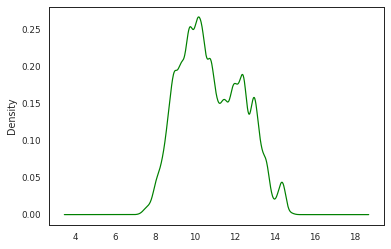

In [340]:
donnees_completes.PM25.plot.density(color='green') 
plt.show()

<AxesSubplot:xlabel='PM25', ylabel='Density'>

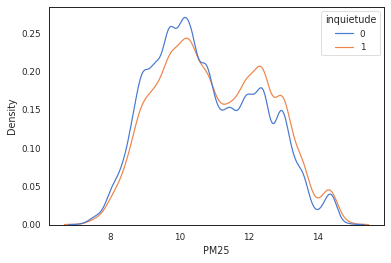

In [356]:
sns.kdeplot(data=donnees_completes[['inquietude','PM25']], x = 'PM25', hue = 'inquietude', common_norm=False)

Evidemment, pas mal d'améliorations peuvent être envisagées : meilleure détection des personnes concernées, meilleure sélection de la commune (surtout si le niveau de pollution devait beaucoup changer !), etc... Et puis également : mieux regarder la base ! Car quand on regarde par exemple un aperçu de la base des contributions qui ne sont pas considérées comme dans le champ ici, on a quand même l'impression de voir quelques doublons...

In [335]:
donnees_completes[donnees_completes['inquietude']==0]

,Q1,authorZipCode,Q1_propre,inquietude,Code_commune_INSEE,Code_postal,ANNEE,code,epc,reg,PM25
0,NaN,97231.0,nan,0,97222,97231.0,NaN,NaN,NaN,NaN,NaN
1,Les problèmes auxquels se trouve confronté l’e...,57000.0,les problemes auxquels se trouve confronte l'e...,0,57463,57000.0,2017.0,57463,200039865.0,44.0,10.761612
2,"Les dérèglements climatiques (crue, sécheresse)",34140.0,"les dereglements climatiques (crue, secheresse)",0,34039,34140.0,2017.0,34039,200066355.0,76.0,10.388298
4,La biodiversité et la disparition de certaines...,35430.0,la biodiversite et la disparition de certaines...,0,35306,35430.0,2017.0,35306,243500782.0,53.0,8.690701
6,La biodiversité et la disparition de certaines...,84750.0,la biodiversite et la disparition de certaines...,0,84112,84750.0,2017.0,84112,200040624.0,93.0,10.287441
...,...,...,...,...,...,...,...,...,...,...,...
153804,"Les dérèglements climatiques (crue, sécheresse)",59960.0,"les dereglements climatiques (crue, secheresse)",0,59426,59960.0,2017.0,59426,245900410.0,32.0,14.231080
153805,La biodiversité et la disparition de certaines...,3140.0,la biodiversite et la disparition de certaines...,0,03053,3140.0,2017.0,03053,200071389.0,84.0,9.027658
153806,La biodiversité et la disparition de certaines...,31130.0,la biodiversite et la disparition de certaines...,0,31184,31130.0,2017.0,31184,243100518.0,76.0,10.101663
153807,La biodiversité et la disparition de certaines...,45000.0,la biodiversite et la disparition de certaines...,0,45234,45000.0,2017.0,45234,244500468.0,24.0,10.528718


Comme pour toute étude, pas d'exception ici, pour avoir quelqu'un chose en lequel on croit, il faut regarder plus en détail, et développer ce qui a été fait ici. A vous de vous y coller si vous le souhaitez !

## 3.3. Aller plus loin

De façon plus générale, pour aller plus loin sur cette problématique, on peut

- Analyser un peu mieux les réponses/préoccupations à partir des champs textuels et proposer de meilleurs résumés
- Explorer d'autres risques environnementaux
    - Achat de pesticides https://data.europa.eu/data/datasets/5d8341258b4c414709e809e9?locale=fr (code postal)
    - Installation rejetant des polluants (air, sol..) https://www.georisques.gouv.fr/donnees/bases-de-donnees/installations-industrielles-rejetant-des-polluants (x,y)
- Analyser la répartition spatiale des contributeurs

In [344]:
iris = sns.load_dataset("iris")

In [345]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
